In [2]:
import cv2
import torch
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
import matplotlib.pyplot as plt
%matplotlib inline

print("라이브러리 임포트 완료")

라이브러리 임포트 완료


In [3]:
# BLIP 모델 초기화
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

print(f"모델 로딩 완료. 사용 중인 디바이스: {device}")

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

모델 로딩 완료. 사용 중인 디바이스: cpu


In [5]:
def generate_caption(image_path):
    # 이미지 읽기
    img = cv2.imread(image_path)
    if img is None:
        return "이미지를 읽을 수 없습니다."
    
    # BGR to RGB 변환
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # PIL Image로 변환
    pil_image = Image.fromarray(img_rgb)
    
    # 이미지 처리 및 캡션 생성
    inputs = processor(pil_image, return_tensors="pt").to(device)
    output = model.generate(**inputs, max_length=50)
    caption = processor.decode(output[0], skip_special_tokens=True)
    
    # 결과 시각화
    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(caption)
    plt.show()
    
    return caption

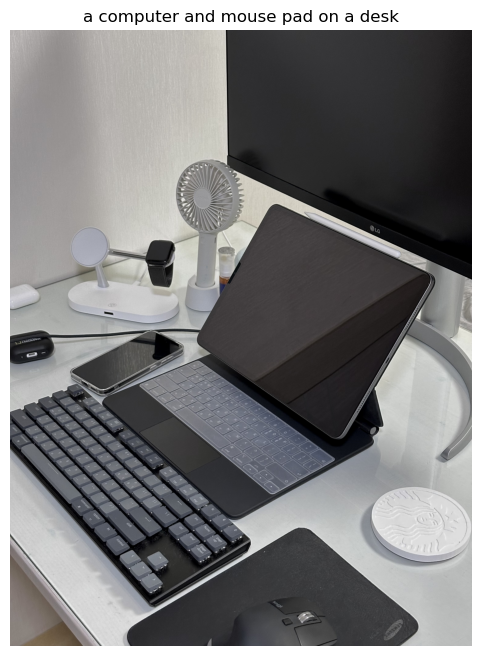


생성된 캡션: a computer and mouse pad on a desk


In [6]:
# 테스트 이미지로 실행
image_path = "./images/image.jpg"
caption = generate_caption(image_path)
print(f"\n생성된 캡션: {caption}")